In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
D2 = pd.read_csv("D2.data",header=None)
D3 = pd.read_csv("D3.csv", sep=";")

In [3]:
#构建分类器
clf = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=0.1,
                kernel='linear', max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)

clf2 = MLPClassifier(solver='lbfgs',activation = 'logistic',max_iter = 2000,alpha = 1e-5,
                     hidden_layer_sizes = (100,),random_state = 1)

In [4]:
#鸢尾花数据集
X1 = D2.iloc[:, 0:-1]
Y1 = D2.iloc[:, -1]

#划分训练集和测试集
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#用SVM模型拟合
clf.fit(X1_train, Y1_train)
#用MLPClassifier模型拟合
clf2.fit(X1_train, Y1_train)

#用测试集测试
prediction1_1 = clf.score(X1_test, Y1_test)
Y1_predict_1 = list(clf.predict(X1_test))
cm1_1 = confusion_matrix(Y1_test, Y1_predict_1)
print("鸢尾花数据集上SVM的准确率为：",prediction1_1)
print("混淆矩阵为：\n", cm1_1)

鸢尾花数据集上SVM的准确率为： 0.9777777777777777
混淆矩阵为：
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [5]:
#用测试集测试
prediction1_2 = clf2.score(X1_test, Y1_test)
Y1_predict_2 = list(clf2.predict(X1_test))
cm1_2 = confusion_matrix(Y1_test, Y1_predict_2)
print("鸢尾花数据集上MLPClassifier的准确率为：",prediction1_2)
print("混淆矩阵为：\n", cm1_2)

鸢尾花数据集上MLPClassifier的准确率为： 0.9777777777777777
混淆矩阵为：
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [6]:
#葡萄酒数据集
X2 = D3.iloc[:, 0:-1]
Y2 = D3.iloc[:, -1]

#划分训练集和测试集
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

#用SVM模型拟合
clf.fit(X2_train, Y2_train)
#用MLPClassifier模型拟合
clf2.fit(X2_train, Y2_train)

#用测试集测试
prediction2_1 = clf.score(X2_test, Y2_test)
Y2_predict_1 = list(clf.predict(X2_test))
cm2_1 = confusion_matrix(Y2_test, Y2_predict_1)
print("葡萄酒数据集上SVM的准确率为：", prediction2_1)
print("混淆矩阵为：\n", cm2_1)

葡萄酒数据集上SVM的准确率为： 0.625
混淆矩阵为：
 [[  0   0   3   0   0   0]
 [  0   0  11   4   0   0]
 [  0   0 165  43   0   0]
 [  0   0  68 131   5   0]
 [  0   0   2  39   4   0]
 [  0   0   0   4   1   0]]


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
#用测试集测试
prediction2_2 = clf2.score(X2_test, Y2_test)
Y2_predict_2 = list(clf2.predict(X2_test))
cm2_2 = confusion_matrix(Y2_test, Y2_predict_2)
print("葡萄酒数据集上MLPClassifier的准确率为：", prediction2_2)
print("混淆矩阵为：\n", cm2_2)

葡萄酒数据集上MLPClassifier的准确率为： 0.6229166666666667
混淆矩阵为：
 [[  0   0   2   0   1   0]
 [  1   1   6   5   2   0]
 [  1   3 146  51   6   1]
 [  0   1  56 125  19   3]
 [  0   0   3  15  27   0]
 [  0   0   1   1   3   0]]


## 性能比较

In [8]:
import matplotlib.pyplot as plt

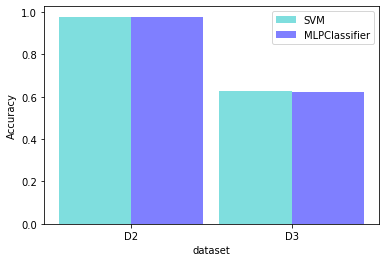

In [10]:
x = np.arange(2)
pre_svm_D2 = [prediction1_1, prediction2_1]
pre_mlp_D3 = [prediction1_2, prediction2_2]

bar_width = 0.45
tick_label = ['D2', 'D3']

plt.bar(x, pre_svm_D2, bar_width, align="center", color="c", label="SVM", alpha=0.5)
plt.bar(x+bar_width, pre_mlp_D3, bar_width, align="center", color="b", label="MLPClassifier", alpha=0.5)

plt.xlabel("dataset")
plt.ylabel("Accuracy")

plt.xticks(x+bar_width/2, tick_label)

plt.legend()
plt.savefig('./D1_DT_NB.svg')
plt.show()